**`Add necessary libraries `**

GitHub Repository  
The complete code and tutorial materials are available at: [GitHub Repository Link] [link text](https://github.com/akheakter/Machine-Learning-Tutorial-Assignment.git)  

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

**Upload dataset and print 1st few rows**

In [ ]:
data = pd.read_csv('/content/city_day.csv')

# Quick look up to our dataset
print("First few rows:")
print(data.head())
print("\nDataset info:")
print(data.info())

First few rows:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ---

**Pre-processing and train test variable**

In [ ]:
# Drop rows with missing values
data = data.dropna(subset=['PM2.5', 'PM10', 'NO2', 'CO'])

# Binary classification:
data['quality'] = data['PM2.5'].apply(lambda x: 1 if x <= 50 else 0)

# Features and target
X = data[['PM2.5', 'PM10', 'NO2', 'CO']]
y = data['quality']

# Scale the features (SVM loves this)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (13641, 4)
Testing set shape: (3411, 4)


<ipython-input-3-92c0068042f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'] = data['PM2.5'].apply(lambda x: 1 if x <= 50 else 0)


**visualize feature relationships**

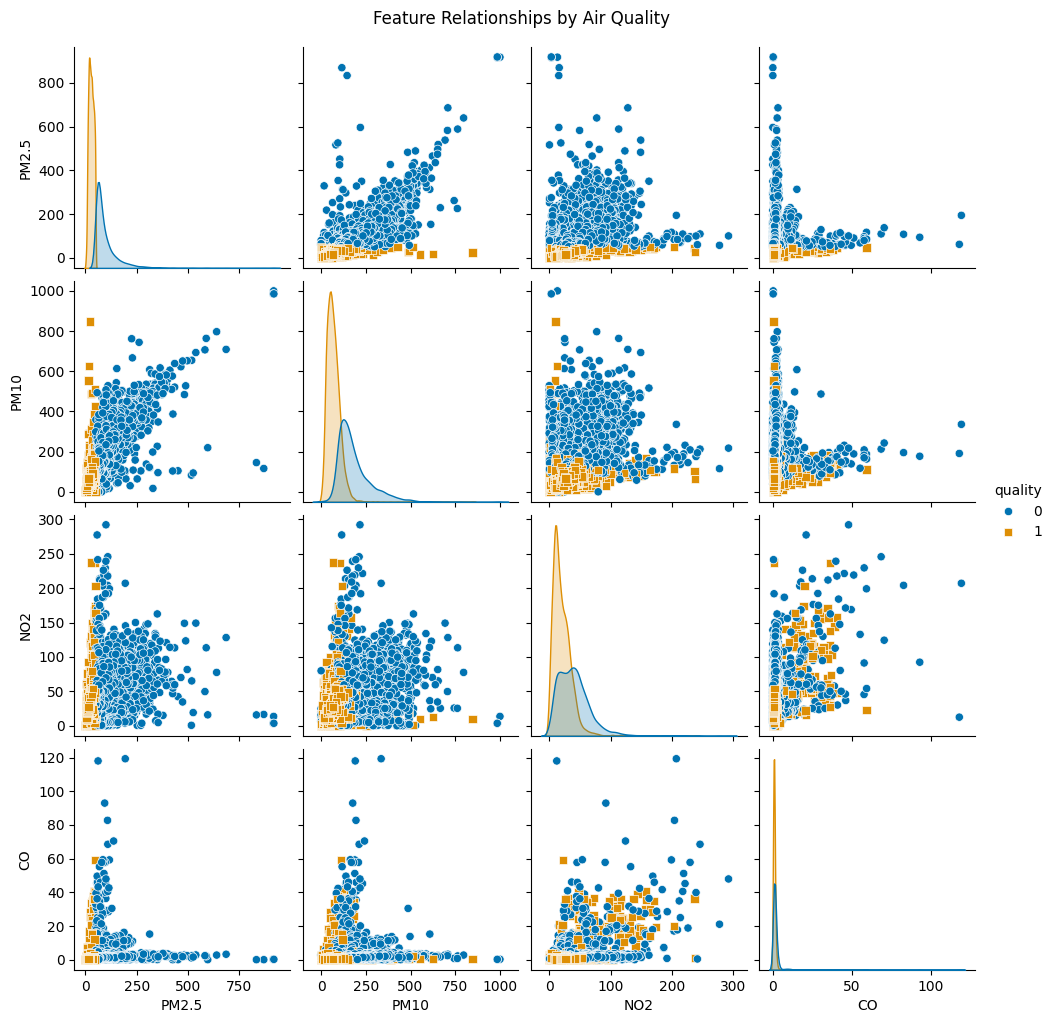

In [ ]:

sns.pairplot(data[['PM2.5', 'PM10', 'NO2', 'CO', 'quality']],
             hue='quality',
             markers=['o', 's'],
             palette='colorblind')
plt.suptitle('Feature Relationships by Air Quality', y=1.02)
plt.show()

**Setting up SVM Model also declear best model along side train the model**

In [ ]:
# Set up SVM with some  fine tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), param_grid, cv=5)
svm_model.fit(X_train, y_train)

print("Best parameters:", svm_model.best_params_)
print("Best cross-validation score:", svm_model.best_score_)

# Training accuracy with the best model define eailer
train_preds = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training accuracy:", train_accuracy)

Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.9996334579497501
Training accuracy: 0.9995601495491533


**Test the mode here**

In [ ]:
test_preds = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.9991204925241864


Plot the confusion matrix here

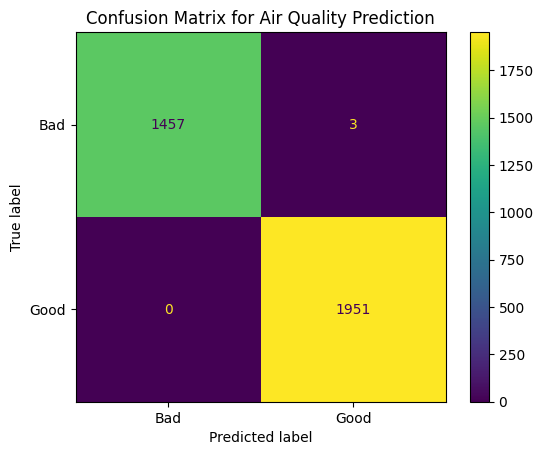

In [ ]:
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot(cmap='viridis', values_format='d')  # 'd' adds integer labels
plt.title('Confusion Matrix for Air Quality Prediction')
plt.show()

**Scatter PM2.5 vs NO2 with predictions**

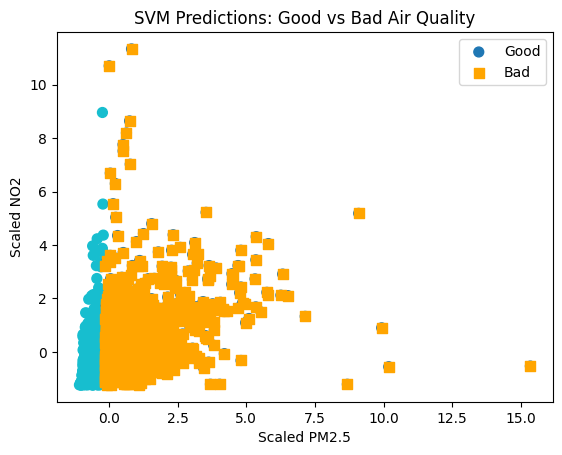

In [ ]:
scatter = plt.scatter(X_test[:, 0], X_test[:, 2],
                      c=test_preds,
                      cmap='tab10',
                      marker='o', s=50, label='Good')
plt.scatter(X_test[test_preds == 0, 0], X_test[test_preds == 0, 2],
            c='orange', marker='s', s=50, label='Bad')
plt.xlabel('Scaled PM2.5')
plt.ylabel('Scaled NO2')
plt.title('SVM Predictions: Good vs Bad Air Quality')
plt.legend()
plt.show()

**checking feature importance**

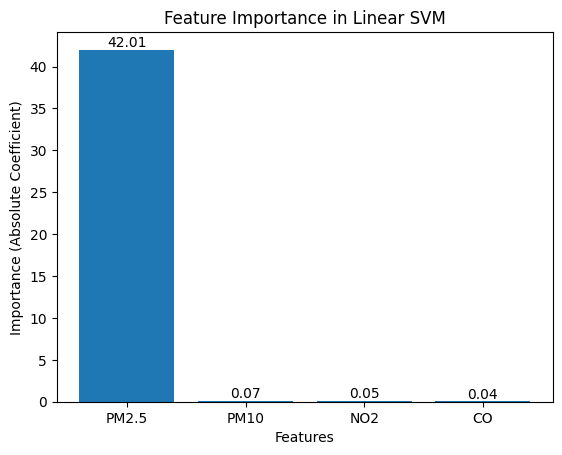

In [ ]:
if svm_model.best_params_['kernel'] == 'linear':
    importance = np.abs(svm_model.best_estimator_.coef_[0])
    features = ['PM2.5', 'PM10', 'NO2', 'CO']
    bars = plt.bar(features, importance, color='tab:blue')
    plt.xlabel('Features')
    plt.ylabel('Importance (Absolute Coefficient)')
    plt.title('Feature Importance in Linear SVM')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom')
    plt.show()
else:
    print("Feature importance only works with linear kernel!")